## 算法效率分析

引入Python中的time模块，计算算法的运行时间

In [1]:
import time
import matplotlib.pyplot as plt
import jieba
from collections import Counter
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

### 分词与词频统计的算法运行时间分析

In [2]:
#种子关键词
seedwords_list=['图片','手机','小说','视频','下载','qq','电影','百度','英语','游戏']

#停用词过滤
stop_word_list=set([' ','的','怎么','我','都','与','你','多少','年','月','什么','及',
                    '和','上','如何','是','吗','有','在','可以','什么','用','了','说',
                    '大','很','版','之','为什么','怎么办','能','玩','级','写',','])
def stop_words_filter(word_list):
    word_cleaned = []
    for word in word_list:
        if word not in stop_word_list:
            word_cleaned.append(word)
    return word_cleaned

def getwordlist(seedword):
    wordlist = [];
    segmentation_file = './seedword_segmentation_'+seedword
    seedwords_data = open(segmentation_file,'r',encoding='utf-8')
    for line in seedwords_data:
        line = line[:-1]
        words = line.split('\t')
        wordlist.extend(words)
    seedwords_data.close()
    return wordlist

# 统计与种子关键词一起出现的词的词频
# 在词频前12中剔除词频最高的种子关键词，先放入候选中介关键词集合中 
def word_frequency_count(seedword):
    word_list = getwordlist(seedword)
    word_list = stop_words_filter(word_list)
    count_result = Counter(word_list)
    midkeywords=[]
    flag = False
    for key, val in count_result.most_common(12):
        #词频最高的一定是种子关键词，不放入midkeywords中
        if flag==True:
            midkeywords.append(key)
        flag=True
    return midkeywords

In [3]:
# 得到种子关键词的候选中介关键词集合
midkeywords_list = []
timelist = []  #存储运行时间
for seedword in seedwords_list:
    starttime = time.time()
    midkeywords_list.append(word_frequency_count(seedword))
    endtime = time.time()
    timelist.append(endtime-starttime)
for i in range(0,10):
    timelist[i]*=10


In [10]:
timelist

[2.6540613174438477,
 3.1540298461914062,
 3.3429431915283203,
 4.088737964630127,
 4.228994846343994,
 5.552651882171631,
 6.6893815994262695,
 6.755580902099609,
 9.276204109191895,
 10.79347848892212]

#### 计算不同的数据规模（搜索条目数量）

In [24]:
querysize = []
def getwordsize(seedword):
    segmentation_file = './seedword_segmentation_'+seedword
    seedwords_data = open(segmentation_file,'r',encoding='utf-8')
    i = 0
    for line in seedwords_data:
        i+=1
    return i
for seedword in seedwords_list:
    querysize.append(getwordsize(seedword))
querysize

[300855, 213004, 178271, 166728, 136402, 102135, 110250, 69295, 78524, 82167]

In [25]:
for i in range(0,10):
    querysize[i]/=10000

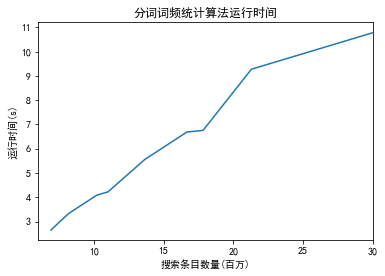

In [53]:
querysize.sort()
timelist.sort()
plt.plot(querysize,timelist)
plt.title('分词词频统计算法运行时间')
plt.xlabel('搜索条目数量(百万)')
plt.ylabel('运行时间(s)')
plt.xlim(6,30)
plt.savefig('分词效率.png')
plt.show()

## CompKey算法运行时间分析

**在第二阶段的代码中，统计$CompKey$算法中竞争性测度（公式中${|ka|}$,${|sa|}$,${|a|}$的计算）需要的时间和整个算法的时间，发现$CompKey$竞争性测度部分运行所需的时间占据了第二阶段代码运行大部分的时间**

在数据预处理的前提下，第二阶段CompKey算法所需要的全部时间及各部分时间如下：  
算法全部运行时间: 512s   
$ComKey$算法中${|ka|}$计算时间:  262.75s  
$ComKey$算法中${|a|}$计算时间: 25.55s  
$ComKey$算法中${|sa|}$计算时间: 106.93s  
其他部分所需时间: 116.77s

In [51]:
label = ['{|ka|}时间','{|a|}时间','{|sa|}时间','其他部分时间']
algorithm_time = [262.75,25.55,106.93,116.77]
explode=[0.01,0.01,0.01,0.01]
colors = ['#fdb0c0','#c79fef','#75bbfd','#fdde6c']

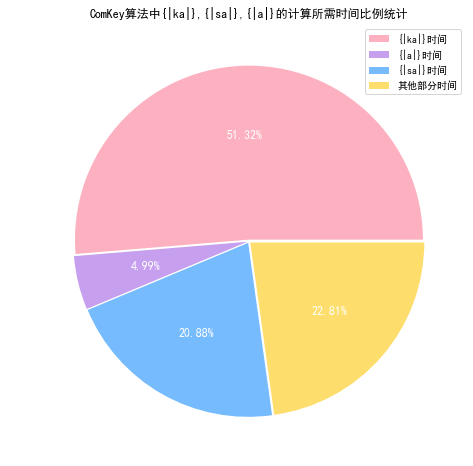

In [52]:
plt.figure(figsize=(8,8))
plt.pie(algorithm_time,explode=explode,labels = label,colors=colors,autopct='%.2f%%',textprops={'fontsize': 12, 'color': 'w'})
plt.title('ComKey算法中{|ka|},{|sa|},{|a|}的计算所需时间比例统计')
plt.legend(loc='upper right')
plt.savefig('pie.png')
plt.show()